In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

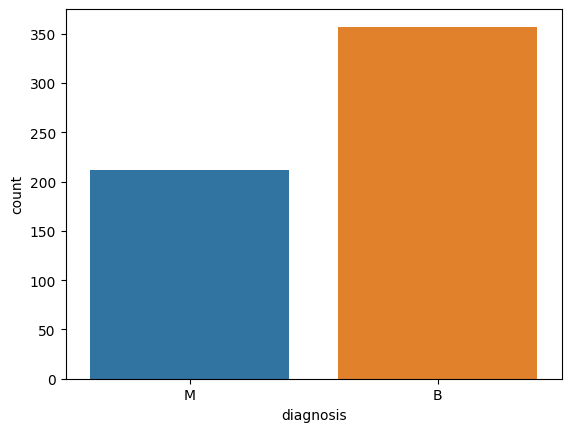

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

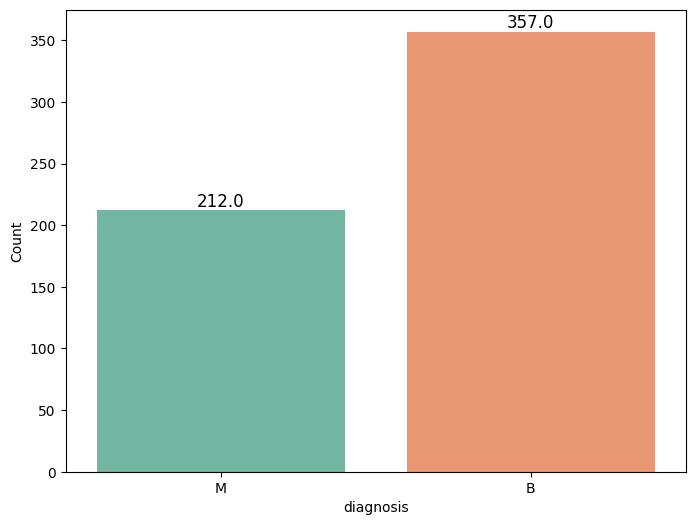

In [9]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
x = df.drop('diagnosis',axis=1)

In [11]:
y = df[['diagnosis']]

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [13]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [14]:
ytest.shape

(171, 1)

In [15]:
xtest.shape

(171, 30)

# Step 3: Decision Tree model and evaluation

In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [17]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [18]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9415204678362573 

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [20]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [21]:
print("\nRandom Forest Model Performance:") 
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n') 
print("Classification Report:") 
print(classification_report(ytest, y_pred_rf)) 


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [22]:
# Define hyperparameters for Decision Tree 
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300], #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [23]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00538526, 0.0024025 , 0.00475535, 0.00252237, 0.0052321 ,
        0.00181379, 0.00482221, 0.00280547, 0.00491333, 0.00211735,
        0.00501289, 0.00250673, 0.00536275, 0.00250959, 0.00471268,
        0.00240507, 0.00471358, 0.00241251, 0.00492706, 0.00225201,
        0.00500956, 0.00220819, 0.00491695, 0.00260825, 0.00502105,
        0.00200295, 0.00501285, 0.00210562, 0.00471072, 0.00210714,
        0.00460868, 0.00200996, 0.00522575, 0.00215893, 0.00523152,
        0.00231209, 0.00481191, 0.00210471, 0.00481224, 0.00200434,
        0.00451531, 0.0022121 , 0.00519028, 0.00230017, 0.00539885,
        0.00240088, 0.00495167, 0.00240655, 0.00521526, 0.00220332,
        0.00460548, 0.00201931, 0.00441089, 0.00232635, 0.00521102,
        0.00230112, 0.00462523, 0.00231304, 0.00491166, 0.00211029,
        0.00482817, 0.00241838, 0.00516596, 0.00197577, 0.00469766,
        0.00260935, 0.00452151, 0.0017035 , 0.00451398, 0.00250807,
        0.00432525, 0.00250783,

In [25]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005385,0.000533,0.002390,0.000391,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,117
1,0.002402,0.000490,0.002650,0.000444,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,37
2,0.004755,0.000554,0.002404,0.000374,gini,None,1,5,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,89
3,0.002522,0.000444,0.002511,0.000317,gini,None,1,5,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9250,0.8875,0.9625,0.924051,0.962025,0.932215,0.028014,21
4,0.005232,0.000507,0.002206,0.000252,gini,None,1,10,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.8875,0.9250,0.911392,0.924051,0.917089,0.016945,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.002103,0.000665,0.002520,0.000319,entropy,30,4,2,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
140,0.005615,0.000381,0.002204,0.000251,entropy,30,4,5,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,5
141,0.001903,0.000490,0.002918,0.000587,entropy,30,4,5,random,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,61
142,0.005113,0.000375,0.002205,0.000815,entropy,30,4,10,best,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,41


In [26]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'best'}

# Perform Grid Search for Random Forest

In [53]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [56]:
tuning_result_rf_gs = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140122,0.003015,0.008200,3.999951e-04,gini,None,auto,1,2,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.936709,0.924051,0.949652,0.018059,437
1,0.278744,0.004168,0.013999,6.975526e-07,gini,None,auto,1,2,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9750,0.949367,0.936709,0.954715,0.013016,101
2,0.430603,0.020589,0.019503,4.474299e-04,gini,None,auto,1,2,300,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9625,0.95,0.9625,0.949367,0.936709,0.952215,0.009644,225
3,0.138122,0.002788,0.008302,7.486548e-04,gini,None,auto,1,5,100,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9750,0.936709,0.949367,0.949715,0.013841,301
4,0.276944,0.005364,0.013600,4.900035e-04,gini,None,auto,1,5,200,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9375,0.95,0.9625,0.949367,0.949367,0.949747,0.007912,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.259339,0.003984,0.013501,4.471871e-04,entropy,30,log2,4,5,200,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377
644,0.388059,0.006067,0.019000,1.784161e-07,entropy,30,log2,4,5,300,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.949367,0.952215,0.009644,205
645,0.130721,0.001565,0.007800,3.999710e-04,entropy,30,log2,4,10,100,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377
646,0.259242,0.003404,0.013801,4.006177e-04,entropy,30,log2,4,10,200,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.9625,0.95,0.9625,0.936709,0.936709,0.949684,0.011535,377


In [57]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

# Evaluate the optimized models

In [27]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))



Decision Tree Grid Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Grid Search



In [58]:
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


Random Forest Grid Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Hyperparameter optimization using Randomized Search

In [28]:
# Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [29]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00260768, 0.00311089, 0.00590806, 0.00250497, 0.0050108 ,
        0.0050498 , 0.00550947, 0.00240517, 0.00441623, 0.0049108 ,
        0.00260415, 0.00581441, 0.00563226, 0.00231323, 0.0052135 ,
        0.0048315 , 0.0024034 , 0.00210514, 0.00220618, 0.00191121,
        0.0026144 , 0.00230179, 0.0053103 , 0.00230322, 0.00220408,
        0.00220814, 0.00190549, 0.00491085, 0.00524564, 0.00531282,
        0.00240588, 0.0054575 , 0.00525441, 0.00472174, 0.0054131 ,
        0.00241537, 0.00240693, 0.00500898, 0.00624256, 0.00200706,
        0.00561113, 0.00481257, 0.00510902, 0.00540948, 0.00481029,
        0.00481482, 0.00532379, 0.00512495, 0.00200233, 0.00200586,
        0.00210366, 0.00250807, 0.00511069, 0.00230718, 0.00220613,
        0.00250754, 0.00501246, 0.00481129, 0.005551  , 0.00481143,
        0.00220265, 0.00461016, 0.00581083, 0.00551729, 0.00210733,
        0.00223308, 0.00300498, 0.0053134 , 0.00491304, 0.00230637,
        0.0022028 , 0.00220594,

In [30]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002608,0.000863,0.003410,0.000868,random,5,2,20,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9250,0.8875,0.9125,0.898734,0.873418,0.899430,0.018133,98
1,0.003111,0.000487,0.002508,0.000318,random,2,1,10,gini,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,24
2,0.005908,0.000586,0.002228,0.000552,best,10,2,None,entropy,"{'splitter': 'best', 'min_samples_split': 10, ...",0.9375,0.8875,0.9750,0.949367,0.936709,0.937215,0.028451,1
3,0.002505,0.000708,0.002708,0.000245,random,2,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 2,...",0.9375,0.8875,0.8875,0.936709,0.873418,0.904525,0.027094,93
4,0.005011,0.000316,0.002508,0.000320,best,5,1,30,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005512,0.000546,0.002205,0.000250,best,2,4,20,entropy,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,4
96,0.005014,0.000708,0.002503,0.000446,best,2,2,None,gini,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9125,0.9125,0.9250,0.949367,0.886076,0.917089,0.020535,66
97,0.002005,0.000551,0.002013,0.000637,random,10,2,10,entropy,"{'splitter': 'random', 'min_samples_split': 10...",0.9250,0.8875,0.9500,0.936709,0.936709,0.927184,0.021362,39
98,0.004710,0.000514,0.003005,0.000317,best,5,1,None,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.8875,0.9250,0.936709,0.936709,0.919684,0.018414,57


In [31]:
dt_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [32]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [33]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.409237,0.009673,0.019459,0.000478,300,5,2,log2,30,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.949367,0.949367,0.954747,0.006335,11
1,0.258610,0.004717,0.013928,0.000337,200,5,1,log2,20,gini,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.9375,0.9500,0.9625,0.949367,0.924051,0.944684,0.013000,94
2,0.438901,0.005092,0.020068,0.000306,300,10,4,auto,30,entropy,"{'n_estimators': 300, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.962025,0.949367,0.954778,0.009996,7
3,0.146066,0.003268,0.008449,0.000475,100,10,4,auto,10,entropy,"{'n_estimators': 100, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.936709,0.936709,0.947184,0.012509,85
4,0.125742,0.002243,0.008519,0.000446,100,2,4,log2,None,gini,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9375,0.9500,0.9625,0.936709,0.936709,0.944684,0.010242,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.384764,0.006087,0.019796,0.000492,300,2,1,log2,None,gini,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.9625,0.9500,0.9625,0.949367,0.936709,0.952215,0.009644,43
96,0.392821,0.005484,0.019099,0.000243,300,5,4,log2,30,entropy,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.9625,0.9500,0.9625,0.936709,0.949367,0.952215,0.009644,39
97,0.280064,0.003738,0.013526,0.000451,200,10,4,sqrt,30,entropy,"{'n_estimators': 200, 'min_samples_split': 10,...",0.9625,0.9375,0.9625,0.949367,0.949367,0.952247,0.009427,25
98,0.265981,0.003442,0.013951,0.000185,200,10,4,auto,30,gini,"{'n_estimators': 200, 'min_samples_split': 10,...",0.9625,0.9500,0.9500,0.949367,0.949367,0.952247,0.005134,25


In [34]:
rf_random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [35]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.97       108
           M       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Randomized Search

In [36]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision Tree

In [37]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

[Text(0.59375, 0.9166666666666666, 'concave points_mean <= 0.051\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.3125, 0.75, 'radius_worst <= 16.83\nentropy = 0.299\nsamples = 245\nvalue = [232, 13]'),
 Text(0.1875, 0.5833333333333334, 'area_se <= 48.7\nentropy = 0.151\nsamples = 230\nvalue = [225, 5]'),
 Text(0.125, 0.4166666666666667, 'texture_worst <= 30.145\nentropy = 0.101\nsamples = 227\nvalue = [224, 3]'),
 Text(0.0625, 0.25, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.1875, 0.25, 'radius_worst <= 14.43\nentropy = 0.469\nsamples = 30\nvalue = [27, 3]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4375, 0.5833333333333334, 'texture_worst <= 19.91\nentropy = 0.997\nsamples = 15\nvalue = [7, 8]'),
 Text(0.375, 0.4166666666666667, 'entropy = 0.0\n

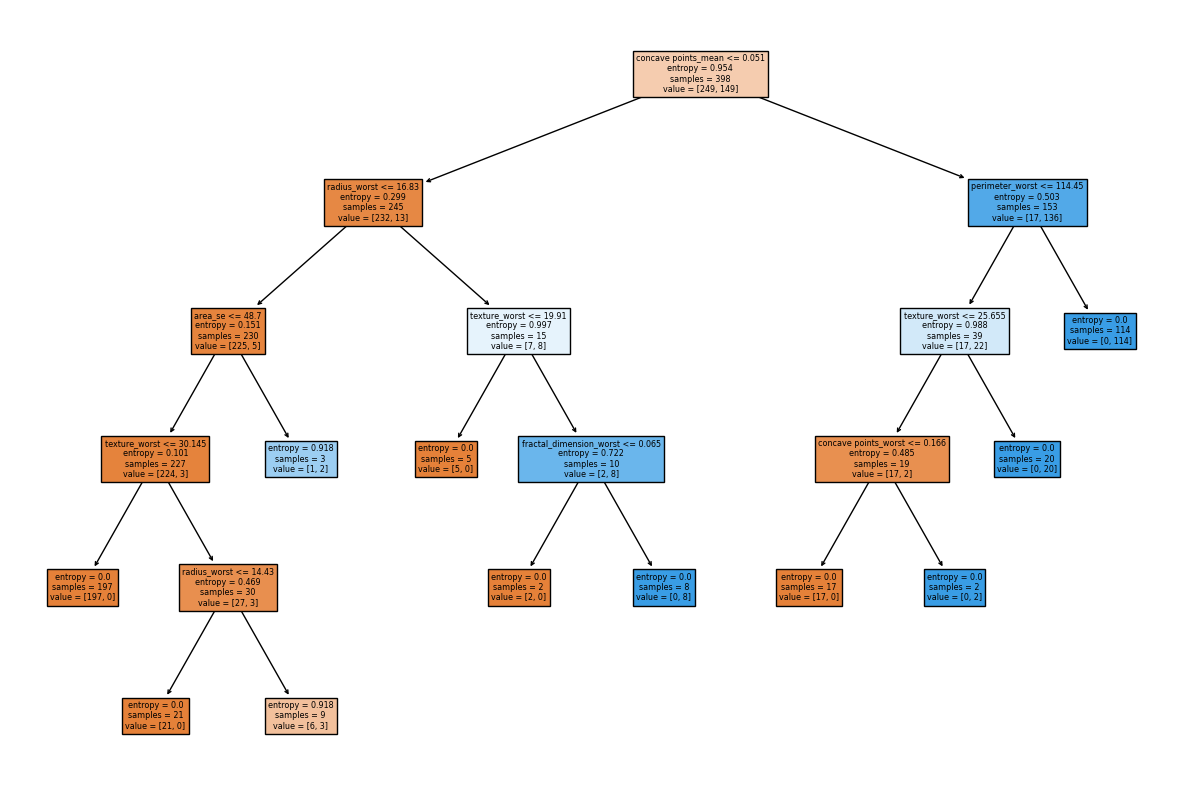

In [38]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

In [39]:
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier  
ccp_alpha_values = pruning_path.ccp_alphas 

In [40]:
ccp_alpha_values 

array([0.        , 0.01458594, 0.0181389 , 0.01942863, 0.02249811,
       0.02254598, 0.02317526, 0.05933369, 0.07364967, 0.0966387 ,
       0.57628768])

In [41]:
clfs_list = []  # save diffrent classifiers

for c in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    

In [42]:
clfs_list 

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014585942967809122, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [43]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ] 
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ] 

In [44]:
train_scores

[1.0,
 0.9597989949748744,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [45]:
test_scores

[0.9415204678362573,
 0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [46]:
import matplotlib.pyplot as plt

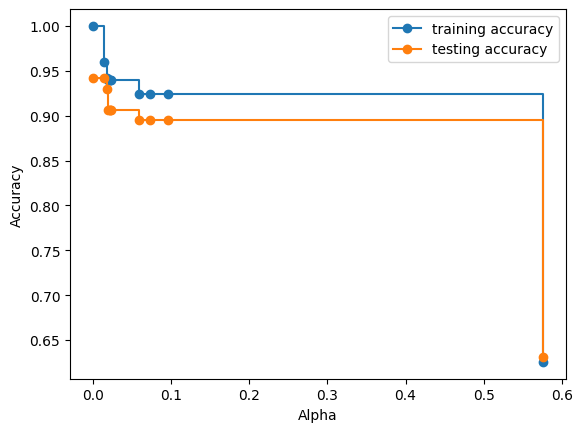

In [47]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [48]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [49]:
pred=clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

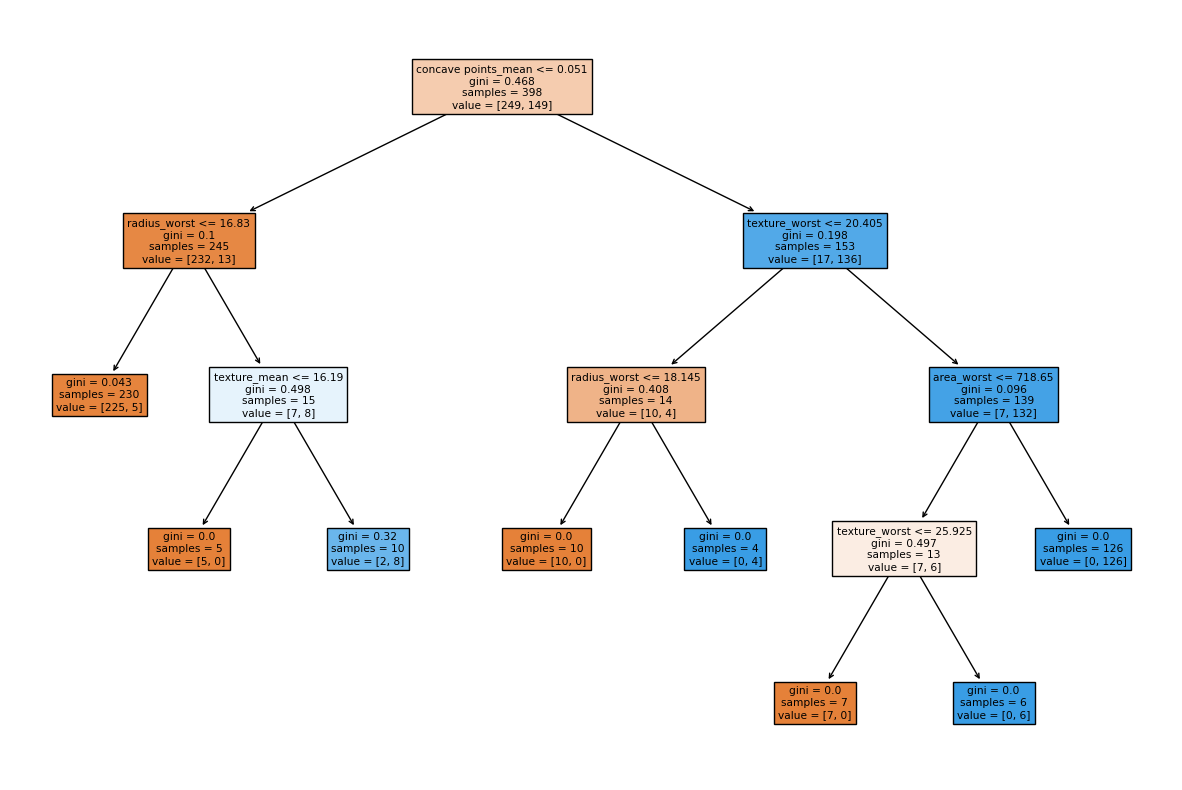

In [50]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBoost

In [51]:
#random & grid
#before performance & after performance

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [76]:
xgb_parm = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

In [83]:
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions = xgb_parm,
    n_iter=100,
    cv=5,  
    random_state=42
)

In [84]:
xgb_random_search.fit(xtrain, ytrain)

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MohammadAshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MohammadAshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\MohammadAshik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['B' 'M']


# ADA Boost

In [52]:
#random & grid
#before performance & after performance

In [99]:
#This is randomize search

In [92]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [93]:
ada = AdaBoostClassifier()

In [94]:
ada_param = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

In [95]:
ada_random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=ada_param,
    n_iter=100,
    cv=5,
    random_state=42
)

In [96]:
ada_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42)

In [97]:
ada_random_search.best_params_

{'n_estimators': 150, 'learning_rate': 1.0}

In [98]:
ada_random_search.best_score_

0.9647784810126583

In [114]:
accuracy_score(ytest, ada_random_search.predict(xtest))

0.9824561403508771

In [116]:
ada_grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=ada_param,
    cv=5,
)

In [117]:
ada_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150, 200]})

In [118]:
ada_grid_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 150}

In [119]:
ada_grid_search.best_score_

0.9647784810126583

In [120]:
y_predict = ada_grid_search.predict(xtest)

In [121]:
accuracy_score(ytest, y_predict)

0.9824561403508771